# <span style="color:crimson">Supervised ML with scikit-learn</span>

## <span style="color:rebeccapurple">Setup</span>

In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting some figure display paramaters
sns.set_context('notebook')
sns.set_style('white', {'axes.linewidth': 0.5})
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.rcParams['figure.dpi'] = 150
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['legend.edgecolor'] = 'w'

## <span style="color:rebeccapurple">Classification with kNN</span>

* kNN, or the k-nearest neighbor algorithm, is a machine learning algorithm that uses proximity (or distance) to compare one data point with a set of data it was trained on and has memorized to make predictions.
* 'k' represents the number of nearest neighbors considered in the classification or regression problem, and 'NN' stands for the nearest neighbors to the number chosen for k.

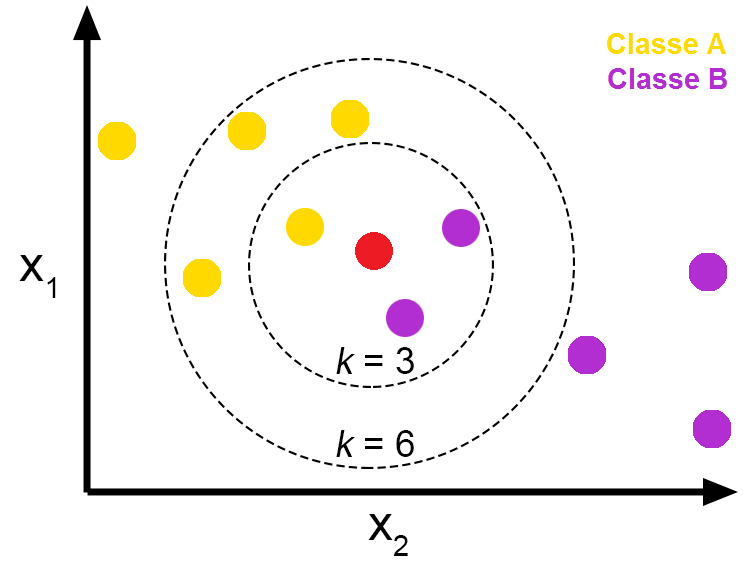

In [3]:
from IPython.display import Image, display
display(Image('images/knn_image.png', width=400))

In the schematic above, an unknown data point (red) will be classified as either class A (yellow) or class B (purple) depending on who its nearest neighbors are in the feature space [x1, x2] , and how many nearest neighbors we choose to use for our estimation.

<b>Let's use kNN to classify wines!</b> <br>
The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

In [4]:
from sklearn import datasets
wine = datasets.load_wine()

# create dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### I. Data exploration

In [5]:
df.shape

(178, 14)

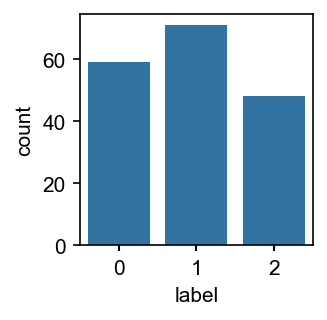

In [6]:
plt.figure(figsize=(2,2))
sns.countplot(df, x="label")
plt.show()

In [7]:
df.groupby("label").mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
label,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


We see from above that some features might be more helpful in the classification than others

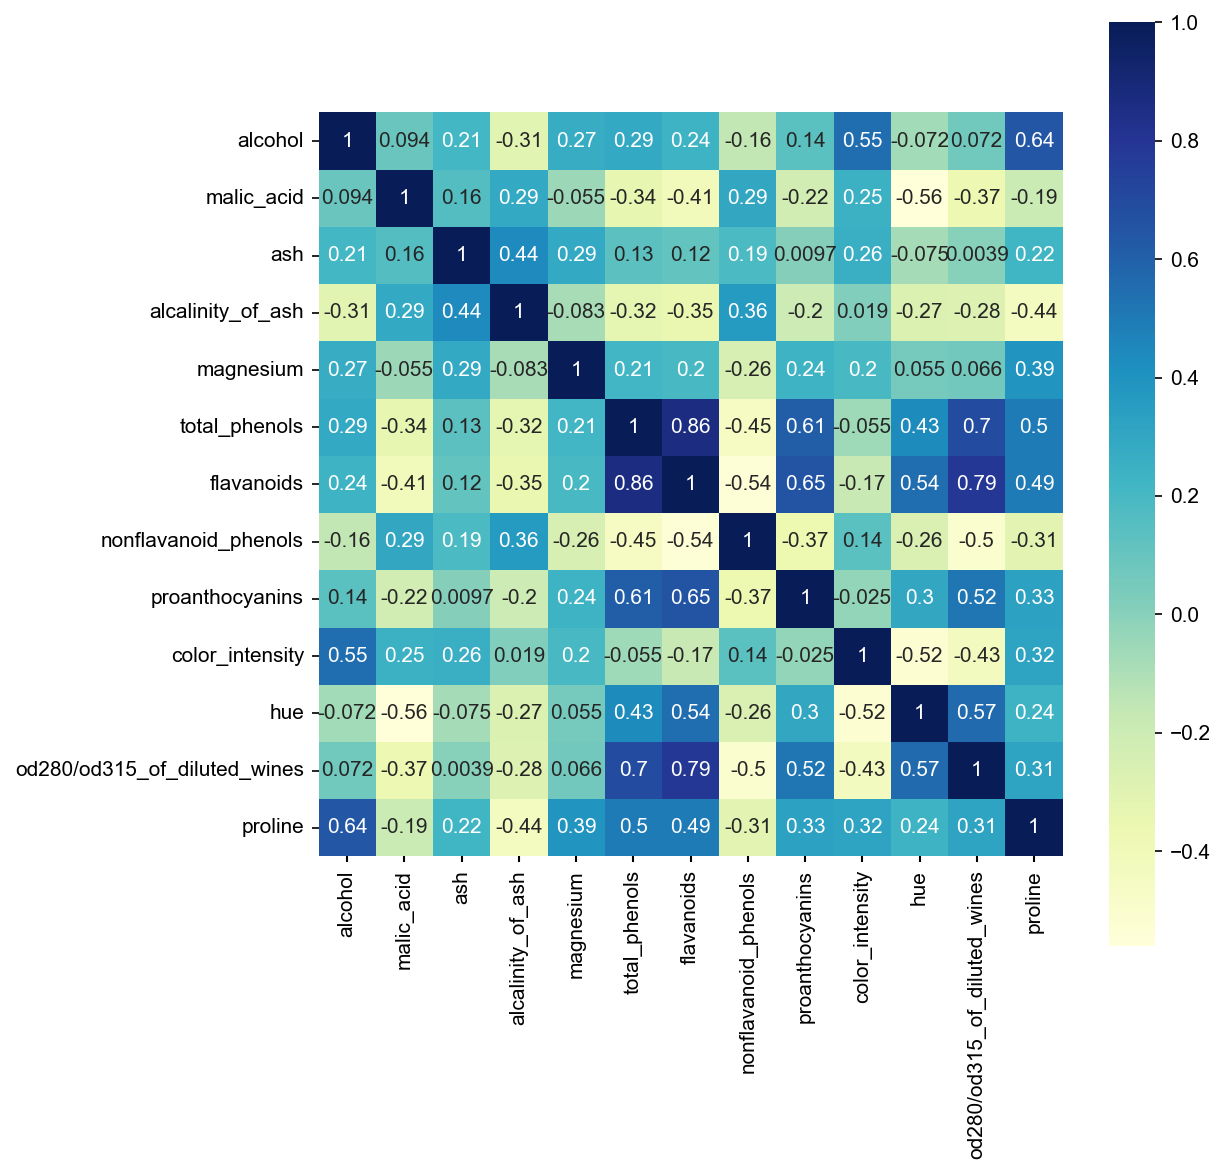

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu", square=True)
plt.show()

Some features seem to be well-correlated with each other. This information can help us decide if we want to reduce the dimensionality of a dataset since highly correlated features carry the same information, and keeping all of them may not be useful.
However, remember there are 3 classes of wine in the dataset, and the correlation matrix might look different for the classes individually.

### II. Feature - target split

We want to predict which cultivator a wine originates from based on the chemical composition of the wine. Therefore, the chemical measurements will be our features or predictors to predict the label/origin.

In [9]:
# separate the input features and the target variable
X = df.drop(columns="label")
y = df.label

X.shape, y.shape

((178, 13), (178,))

### III. Building a kNN model

In [10]:
# import the model class from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# create an instance of the class object
model = KNeighborsClassifier(n_neighbors=3) # choosing the value of k to be 3

In [12]:
# fit the model with the X and y data
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# predict the classes
model.predict()

TypeError: KNeighborsClassifier.predict() missing 1 required positional argument: 'X'

However, what will we predict on - we used all our available data to train the model!

### IV. Train-test split

In order to build a model based on the available data, we would need to keep some portion of it "unseen" so that we can assess how well the trained model works.

In [14]:
# import function 
from sklearn.model_selection import train_test_split

In [15]:
# split the data 70-30, and ensure labels are distributed proportionately between train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,           # features, labels
                                                    test_size=0.3,  # fraction of data as test
                                                    stratify=y,     # stratification of data by y
                                                    random_state=42)# seed parameter -- optional

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

### <span style="color:crimson">Exercise</span>
Re-build the kNN model from above, but only using the training data to fit the model this time.

In [17]:
# create a model object of class KNeighborsClassifier with k=3
model = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training data
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

Now that we have our fitted model, let's look at how well it can predict unseen data-points

### IV. Generating predictions

We will generate predicted labels for each observation in the test data. Then we will compare the predicted labels to the actual/observed labels.

In [18]:
model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0,
       1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 2, 0, 1, 1, 2, 0])

In [19]:
# store the predicted labels in y_pred 
y_pred = model.predict(X_test)

We can also generate predicted probabilities for each class (the class with the highest probability for a given observation is chosen as the predicted "label" above)

In [20]:
model.predict_proba(X_test)

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.66666667, 0.        , 0.33333333],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [0.

Probabilities are helpful to decide thresholds of classification.

For example, in a binary classification problem with only 2 labels, by default a probability value 0.5 is used as a threshold. Therefore, if the probability for class 1 is equal to or greater than 0.5, it will be classified as a "positive" (or whatever the label is). But sometimes, you get better model performance when the threshold is adjusted up or down.

In multi-class classification (as in our wine dataset with 3 classes), the class with the highest predicted probability is chosen as the predicted label for each sample.

### V. Model evaluation

There are several ways to evaluate classification models. For now, let's look at the model accuracy i.e. how many times did the model predict the label correctly.

#### Accuracy

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
# what fraction of samples were correctly predicted
accuracy_score(y_test, y_pred)

0.6851851851851852

In [23]:
# setting normalize=False gives us the number of correctly predicted samples
accuracy_score(y_test, y_pred, normalize=False)

37.0

#### Classification report

You can also build a text report showing the main classification metrics

In [24]:
from sklearn.metrics import classification_report

In [25]:
# classification_report(y_true, y_pred, target_names)

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.94      0.89        18
     class 1       0.67      0.67      0.67        21
     class 2       0.46      0.40      0.43        15

    accuracy                           0.69        54
   macro avg       0.66      0.67      0.66        54
weighted avg       0.67      0.69      0.68        54



The method of evaluation depends on the user. For example, perhaps it is more important for  me to make sure I catch all the true positives for cancer in a cancer diagnosis dataset. If 95% of samples are cancer-negative in a general population, then predicting "negative" for every sample without any learning will still give me a 95% accuracy rate!

The above example is also a problem of what is called<b> "class imbalance"</b>. Not controlling for class imabalances will give you falsely high accuracy rates. There are ways to deal with this, for example by setting "weights" for each class to balance them. This is similar to over-sampling or under-sampling a particular class.

#### AUROC (for 2 classes)

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the performance of a binary classifier model at varying threshold values. The ROC curve is the plot of the true positive rate against the false positive rate at each threshold setting.

AUROC or Area under the ROC is a performance metric for “discrimination”: it tells you about the model’s ability to discriminate between cases (positive examples) and non-cases (negative examples.) An AUROC of 0.8 means that the model has good discriminatory ability: 80% of the time, the model will correctly assign a higher absolute risk to a randomly selected patient with an event than to a randomly selected patient without an event.

The AUROC is more informative than accuracy for imbalanced data.

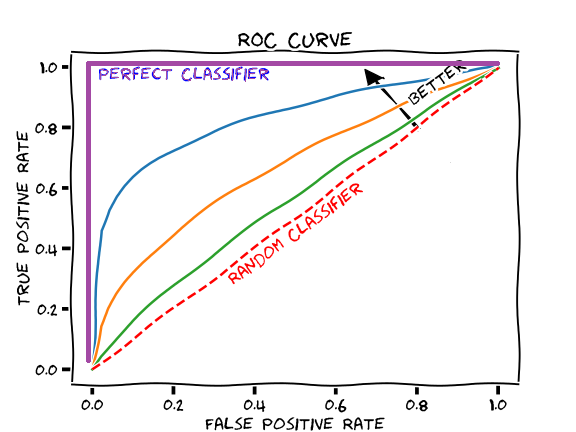

In [26]:
from IPython.display import Image, display
display(Image('images/roc_curve.png', width=600))

The worst AUROC is 0.5, and the best AUROC is 1.0.

Let's see an example using a breast cancer dataset where samples are classified as either malignant or benign based on morphological features of the cell nuclei.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


(569, 31)


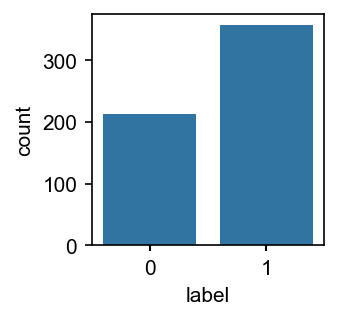

In [27]:
breast_cancer = datasets.load_breast_cancer()

# create dataframe
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['label'] = breast_cancer.target

display(breast_cancer_df.head())

print(breast_cancer_df.shape)

plt.figure(figsize=(2,2))
sns.countplot(breast_cancer_df, x="label")
plt.show()

You can see above that the classes are imbalanced - there are many more benign (class 1) samples in the dataset than malignant (class 0) samples.

Below we build a kNN classification model and plot the AUROC curve for different values of k

In [28]:
def plot_auroc_breast_cancer_data(k):
    from sklearn.metrics import roc_curve, auc
    
    # build kNN model fit to classify malignant [class 0] or benign [class 1] samples
    X = breast_cancer_df.drop(columns='label')
    y = breast_cancer_df.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)

    # model evaluation
    y_scores = knn.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    plt.figure(figsize=(3,3))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(f'ROC Curve of kNN, k={k}')
    plt.show()
    return

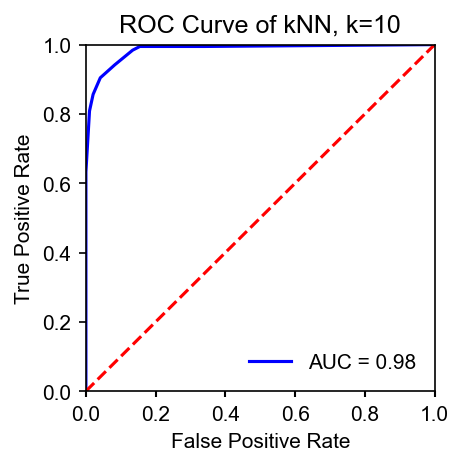

In [29]:
plot_auroc_breast_cancer_data(k=10)

### <span style="color:crimson">Exercise</span>
Generate ROC curves and look at the AUC value for k=1, and k=100.<br>
Which one is the better classifier?

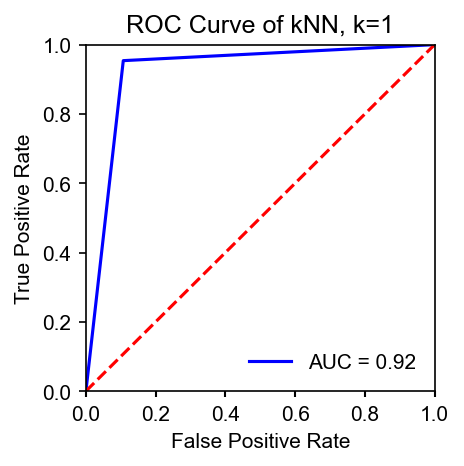

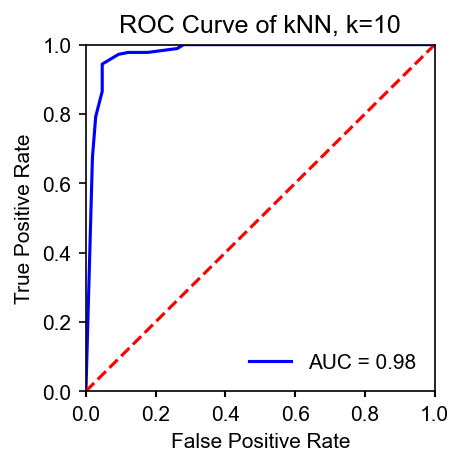

In [32]:
plot_auroc_breast_cancer_data(1)
plot_auroc_breast_cancer_data(10)

Note though, you cannot always acheive an AUROC of 1.0 - that would mean perfect classification! The goal is usually to get a model that performs above 0.5, with typically 0.7-0.9 considered as good performance. The performance also depends on the data - if the data is complex or noisy, acheiving high performance is difficult or impossible sometimes.

### VI. Model optimization
Can we make our wine classification kNN model even more accurate?

We used the parameter `n_neighbors` to set the value of k. We arbitrarily chose 3 neighbors, but how do we know this was the correct choice?

One way to understand if there is room for improvement is to see how well the model works for the data on which it was trained vs the unseen test data

### <span style="color:crimson">Exercise</span>
We used the training data to teach the model how to learn. Let's see how well it learnt the training data itself. In an ideal scenario, the model should be 100% accurate on the training samples.

Generate predictions for the training dataset, and get model accuracy for the training labels

In [33]:
y_train_pred = model.predict(X_train)

In [34]:
accuracy_score(y_train , y_train_pred)

0.8548387096774194

We see that our model predicts much better on the data on which it was trained, compared to unseen data! This means that there is space for improvement. Ideally you want to get the model optimized such that it performs equally well (or as closely matched as possible) for the train and the test set.

This is because we want the model to generalize well to unseen samples rather than over-fitting to the samples in the training data. Consider that if we were to generate a different train-test split, we would get a completely different model if it was over-fitted to the samples in each train set.

<b> Creating a performance optimization curve </b> <br>
In order to choose the best value of k (on `n_neighbors`) we must build models with several different values of k, and compare their train and test accuracy. The parameter value at which train and test data sets perform equally well is usually the sweet-spot.

### <span style="color:crimson">Exercise</span>
Generate a performance curve for different values of k neighbors, and decide which is the best value of k to choose

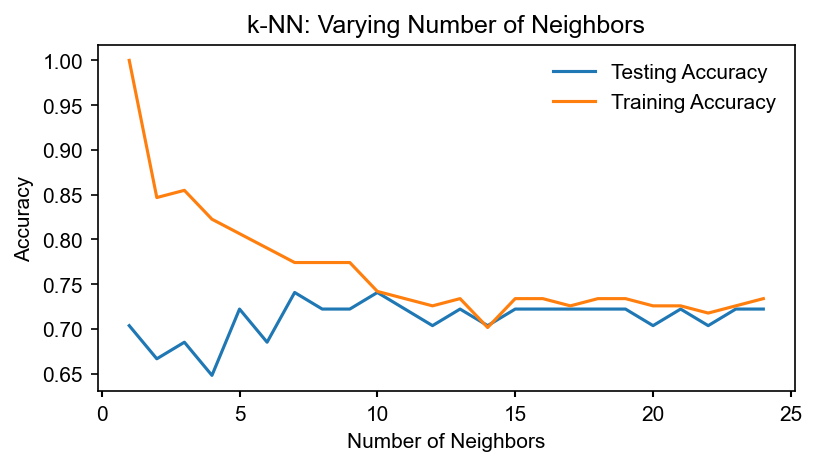

In [35]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors
    model = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    model.fit(X_train , y_train)

    # Compute the accuracy on the training set
    y_train_pred = model.predict(X_train)
    train_accuracy[i] = accuracy_score(y_train_pred, y_train)

    # Compute the accuracy on the test set
    y_test_pred = model.predict(X_test)
    test_accuracy[i] = accuracy_score(y_test_pred, y_test)


# Generate plot
plt.figure(figsize=(6,3))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

What do you observe? 

Which is the best value of k neighbors?

Notice in the plot above that choosing k=1 would give you near-perfect classification accuracy on the training data - this is a case of over-fitting to the training data. And this over-fitted model does not give us the best possible accuracy on the testing/unseen data.

### VII. Detour: Model Complexity

* Model complexity refers is a measure of how well a model can capture the underlying patterns in the data. In the context of machine learning, model complexity is often associated with the number of parameters in a model and its ability to fit both the training data and generalize to new, unseen data.
  
* Simple models have few parameters, making them less flexible therefore they struggle to capture the complexity of the underlying patterns in the data leading to underfitting, where the model performs poorly on the training data as well as on unseen data.
  
* Complex models have a larger number of parameters, allowing them to represent more intricate relationships in the data. While complex models may perform well on the training data, model tends to overfitting.
Modelling complexity can be influenced by several factors:

* Number of Features: The more attributes or features your model scrutinizes, the higher its complexity is likely to be. Too many features can potentially magnify noise and result in overfitting.

* Model Algorithm: The nature of the algorithm used influences the complexity of the model. For instance, decision trees are considerably simpler than neural networks.

* Hyperparameters: Settings such as the learning rate, number of hidden layers, and regularization parameters can influence the complexity of a machine learning model.

#### Why Model Complexity is Important?
Finding the optimal model complexity is important because:

* <b>Bias-Variance Tradeoff:</b> Model complexity is closely related to the bias-variance tradeoff. Simple models may have high bias (systematic errors), while complex models may have high variance (sensitivity to small fluctuations in the training data). Finding the right level of complexity involves managing this tradeoff to achieve good predictive performance.
  
* <b>Computational Resources:</b> Complex models often require more computational resources for training and inference. The choice of model complexity may be influenced by practical considerations such as available computing power and time constraints.
  
* <b>Interpretability:</b> Simple models are often more interpretable, making it easier to understand and explain their decision-making processes. In some cases, interpretability is crucial, especially in sensitive applications where decisions impact individuals’ lives.


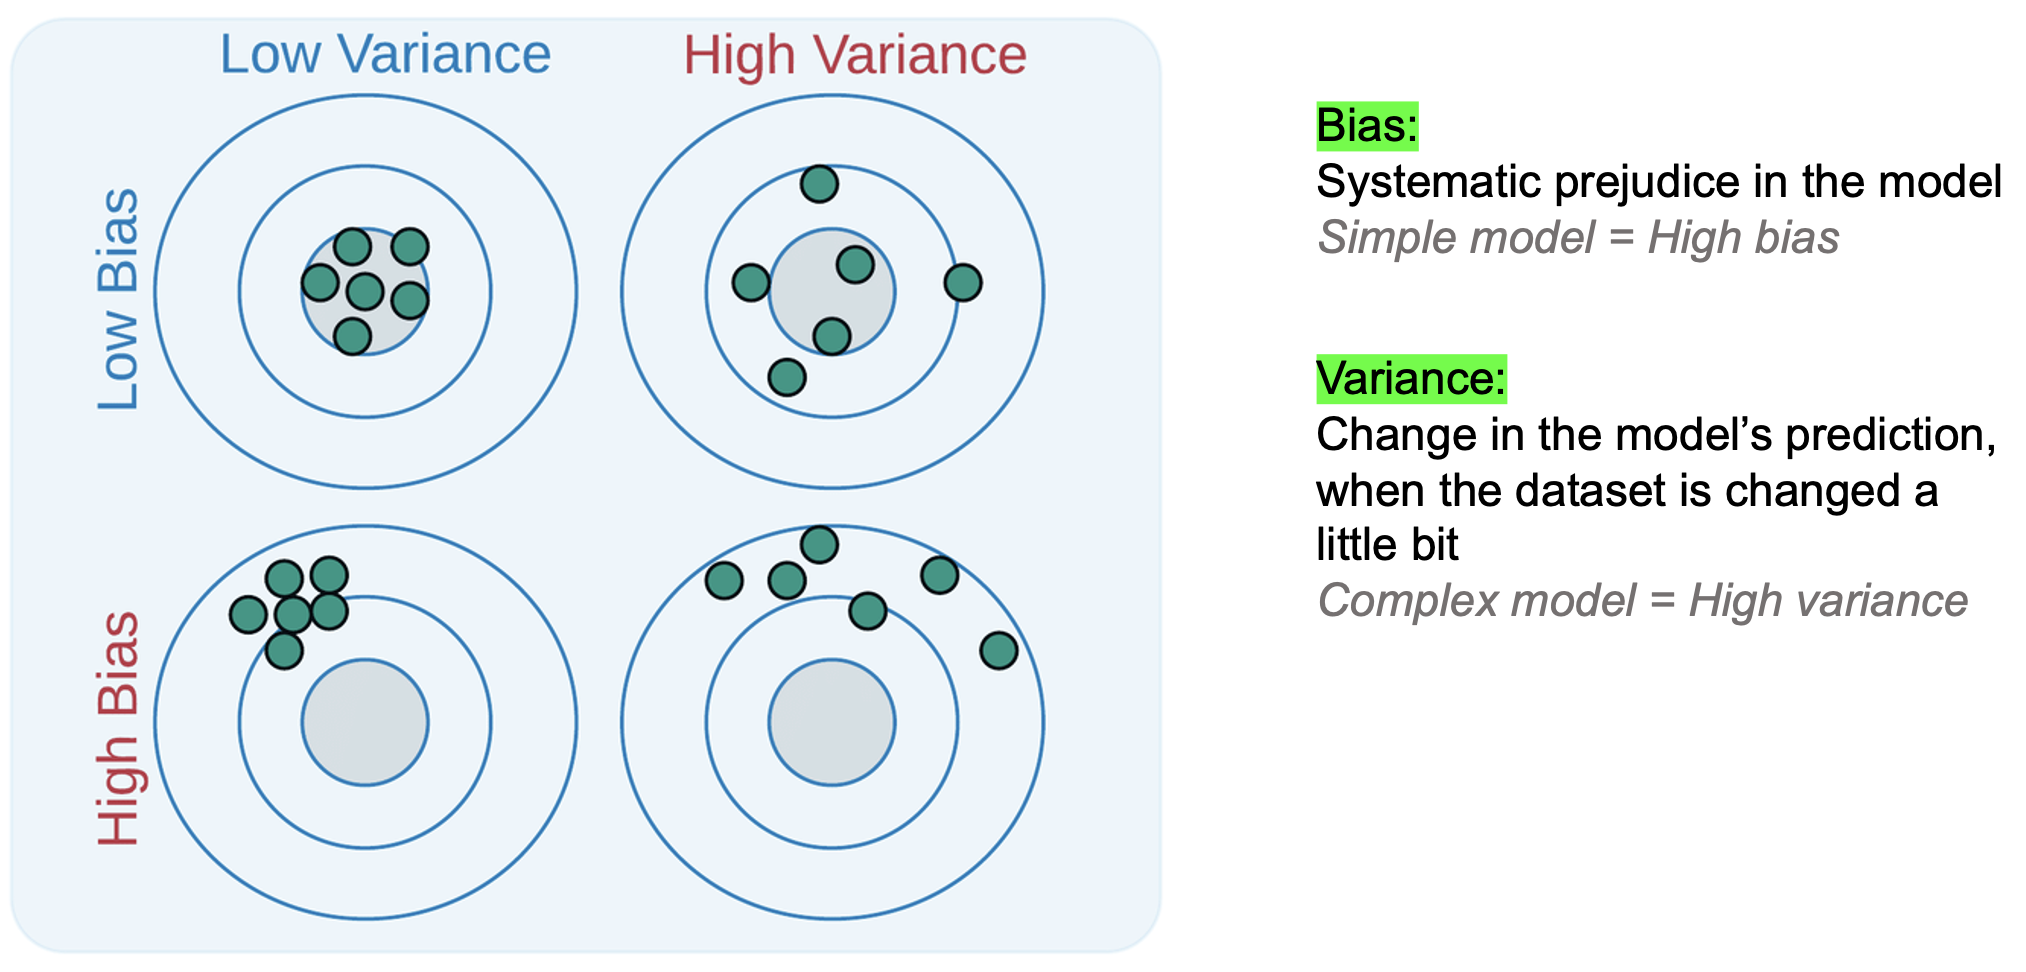

In [36]:
from IPython.display import Image, display
display(Image('images/bias_variance.png', width=600))

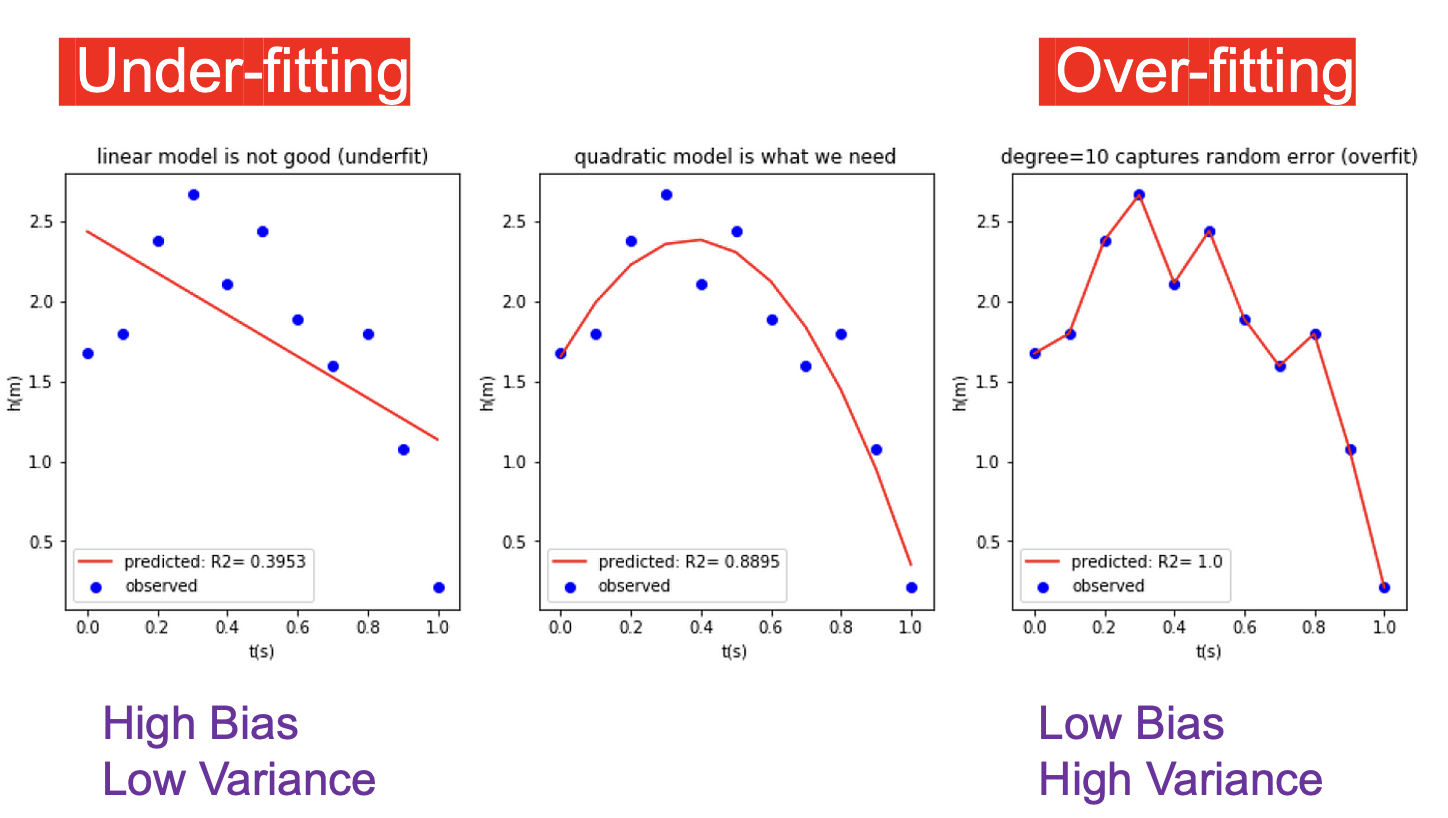

In [37]:
from IPython.display import Image, display
display(Image('images/linear_model_bv.png', width=600))

#### What is Model Overfitting?

Overfitting happens when a machine learning model gets trained too well on the so-called training data. While it may sound like a good thing, in reality, an overfitted model performs poorly when it encounters new, unseen data since it’s considered too tuned to the training set. A good model should generalize well, not just perform well with the training data, but with new data as well.

The concept of model overfitting is closely tied to model complexity. When a model is too complex, it has the capacity to fit the training data very closely, capturing even the smallest variations and fluctuations. While this may result in high accuracy on the training set, the model becomes excessively tailored to the specific characteristics of that data.

As a consequence, the model struggles to generalize to diverse data points outside the training set, exhibiting poor performance on new data. In essence, overfitting is often a consequence of excessive model complexity, highlighting the importance of finding the right balance between simplicity and complexity to ensure robust generalization.

#### How to Avoid Model Complexity and Overfitting?

Addressing model complexity and overfitting is critical to achieving robust machine learning models. Here are some strategies:
* <b>Split the dataset into training and testing Data:</b> Splitting your dataset is crucial because it ensures the model doesn’t simply memorize the training data and can generalize to unseen examples.

* <b>Reducing Features:</b> By minimizing the number of input features, we could lower the complexity, and thus, prevent overfitting. Essentially, we would only keep the important or relevant features for classification, and discard the rest.

* <b>Cross-validation:</b> Cross-Validation is a technique that assesses model generalization and provides a realistic measure of how well the model is likely to perform on unseen data, helping to assess its level of complexity and overfitting. Essentially it involves creating several train-test splits instead of just one split, and then using all these splits to fit a better, more generalized model. (But beware of data leakage!! - we will see how to do this properly)

* <b>Regularization:</b> Regularization techniques introduce penalties for complexity in the loss function of the model which discourages learning overly complex model parameters, discouraging overfitting. L1 and L2 regularization are common methods to control the magnitude of coefficients, preventing the model from becoming overly complex.
    
* <b>Use of Ensemble Models:</b> Combining predictions from multiple diverse models can often lead to better performance and reduced risk of overfitting compared to relying on a single model. This is because individual models may have unique strengths and weaknesses, and averaging their predictions can lead to a more robust and generalizable result.

#### Decision boundaries and model complexity
A decision boundary is a surface that separates two or more classes into different sets, where all the points belonging to one class lie on one side of the decision boundary. Let's see what that looks like for a toy dataset called `iris`

In [38]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


To make the decision boundary easier to visualize we will assume the dataset has only 2 features, as follows:

In [39]:
iris_df = iris_df[['sepal length (cm)',	'sepal width (cm)', 'label']]
iris_df.head()

,sepal length (cm),sepal width (cm),label
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [40]:
def plot_iris_decision_boundary(n_neighbors):
    from matplotlib.colors import ListedColormap

    # convert to numpy array for plotting a mesh plot
    X = np.array(iris_df.drop(columns='label'))
    y = np.array(iris_df.label)
    
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # color maps
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(2,2))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=0.5)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("kNN classification (k = %i)"% (n_neighbors))
    plt.show()
    return

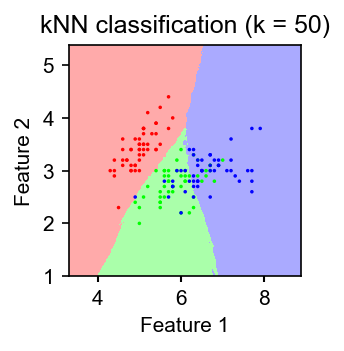

In [41]:
plot_iris_decision_boundary(n_neighbors=50)

A real-world dataset usually has many features, and therefore the decision boundary is usually a hyperplane or hypersurface in N-dimensional feature space.

A simple model might have linear or simple decision boundaries, while a complex model might have non-linear convoluted decision boundaries.

### <span style="color:crimson">Exercise</span>
Use the `plot_iris_decision_boundary` function to plot what the classification boundaries look like for models built with different `n_neighbors` (k) values for the iris dataset which has 150 total observations. The function takes only one input which is the k value.

Choose different values of k between 1-150 to see how the classification model changes. Does it become more or less sensitive to individual data-points as k increases?

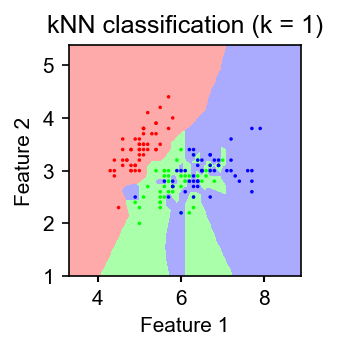

In [42]:
plot_iris_decision_boundary(n_neighbors=1)

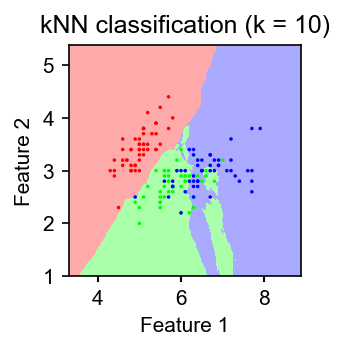

In [43]:
plot_iris_decision_boundary(n_neighbors=10)

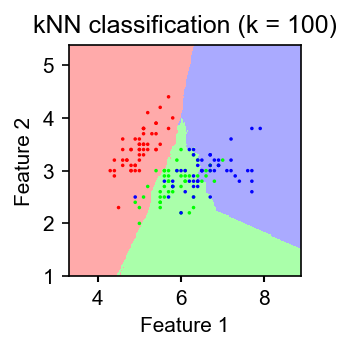

In [44]:
plot_iris_decision_boundary(n_neighbors=100)

### VIII. Back to Model Optimization: Feature scaling

Can we make our kNN model even better??<br>
Let's take a re-look at our dataset features

In [45]:
df.describe().loc[['mean', 'std']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035


The numerical ranges and values of the different features of the data have extremely different ranges, from ~1000 for proline to ~0.5 for nonflavonoid_phenols.

Recall that kNN calculates the distance in feature space between observations. If we assume that distance refers to Euclidean distance (it doesn't have to), it would look as follows:
$$\begin{align}
d = \sum_{i=1}^N \sqrt {\left( {f_{i1} - f_{i2} } \right)^2 }
\end{align}$$
where $f_{i1}$ refers to the $i$th feature of data-point 1 and $f_{i2}$ refers to the $i$th feature of data-point 2. Therefore, we calculate the distance between 2 points on every feature dimension/axis, sum them up and then take the square root of the sum.

If the scales in which the individual feautures are measured are vastly different, then the distance calculation will be much more sensitive to large feature values (such as proline) but not to small feature values (such as nonflavonoid_phenols).

This will affect the calculation of the "nearest neighbor" in Euclidean space. For example, a 10% change in the value of nonflavanoid_phenols from $0.36$ to $0.39$ will be much less important that a 10% change in the value of proline from $746$ to $820$ i.e. features on large numerical scales will be default be considered "more important" than features on smaller numerical scales!

A different way to think about this is consider if my feature space is height and weight of individuals to predict/classify for liekleihood of diabetes. If I meaure the height in m and weight in kgs it will be different that measuring the height in cm and weight in kg. Simply changing the scale will change the importance of the height metric.

#### Centering and scaling
In order to make the measurements scale-independent, we can modify the features such that they are all on the same scale and therefore all equally important for the distance calculation. A popular way of doing this is centering and scaling (also called feature standardization).

#### <span style="color:teal">Standardization</span>
This is the process of converting data into the standard format where each feature has zero mean and unit variance (i.e., std=1).
$$ x' = \frac{x - \mu}{\sigma}$$

We can do this easily with sklearn --

##### a) Find the fit parameters for standardization

In [46]:
# import the class "StandardScaler" from the scikit learn library
from sklearn.preprocessing import StandardScaler

In [47]:
# scaler is an object or instance of class StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [48]:
# now feed your feature data X for pre-processing into this object
X = df.drop(columns='label')
scaler.fit(X)
scaler

StandardScaler()

Hover on the "i" icon - what does it say now? <br>
Once the data is fit, it means that the scaler has calculated the parameters for scaling i.e. the mean and the standard deviation, for each of the numeric columns. However, we still need to calculate the scaled (also called transformed) values ($x'$)

##### b) Transform the data with the fit paramaters you found

In [49]:
scaled_X = scaler.transform(X)

In [50]:
# convert to a dataframe to view
scaled_X_df = pd.DataFrame(data = scaled_X, columns= X.columns)


print('---- scaled mean-----')
print(scaled_X_df.describe().loc['mean'])
print('\n---- scaled std-----')
print(scaled_X_df.describe().loc['std'])

---- scaled mean-----
alcohol                         7.943708e-15
malic_acid                      3.592632e-16
ash                            -4.066660e-15
alcalinity_of_ash              -7.983626e-17
magnesium                      -7.983626e-17
total_phenols                  -3.991813e-17
flavanoids                      9.979533e-16
nonflavanoid_phenols           -5.588538e-16
proanthocyanins                -1.656602e-15
color_intensity                -3.442939e-16
hue                             1.636643e-15
od280/od315_of_diluted_wines    2.235415e-15
proline                        -1.197544e-16
Name: mean, dtype: float64

---- scaled std-----
alcohol                         1.002821
malic_acid                      1.002821
ash                             1.002821
alcalinity_of_ash               1.002821
magnesium                       1.002821
total_phenols                   1.002821
flavanoids                      1.002821
nonflavanoid_phenols            1.002821
proanthocyanins 

What do you notice about the mean and standard deviation of the transformed values?

Let's see scaling affects model performance or accuracy!

### IX. Creating a better model with feature scaling
Now that we know how to do this, we should go back and scale our train and test data before fitting and evaluating our kNN model. 

It is critical to treat the test and train sets <b>independently</b> instead of scaling the whole dataset at once. This is done to avoid data leakage i.e. unintentionally exposing our test data set to the model. Since the model never sees the test data, the model should only learn the scaling fit parameters from the train data. However, once the model learns the scaling fit parameters, both the train and test sets can be transformed with these learned values.

### <span style="color:crimson">Exercise</span>
Can you guess why scaling <i>before</i> splitting the data might lead to data leakage?

### <span style="color:crimson">Exercise</span>
<b>Putting it all together</b><br>
Rebuild the kNN model with feature scaling, and test for best k values by generating a performance curve.

In [51]:
# reload the dataset to start afresh
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


#### Step 1: Feature - Target split

In [52]:
# separate the input features and the target variable
X = df.drop(columns='label')
y = df.label

X.shape, y.shape

((178, 13), (178,))

#### Step 2: Train - Test split

In [54]:
from sklearn.model_selection import train_test_split

# split the data 70-30, with 30% in the test set
# Make sure the label classes are evenly distributed between the train and test sets

X_train, X_test, y_train, y_test = train_test_split(X , y , 
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

#### Step 3: Data pre-processing with feature scaling
Remember, scale the training data only!

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

Transform both the train and test X with the learned scaling fit parameters.

In [56]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Step 3: (kNN) Model building and optimization for best accuracy


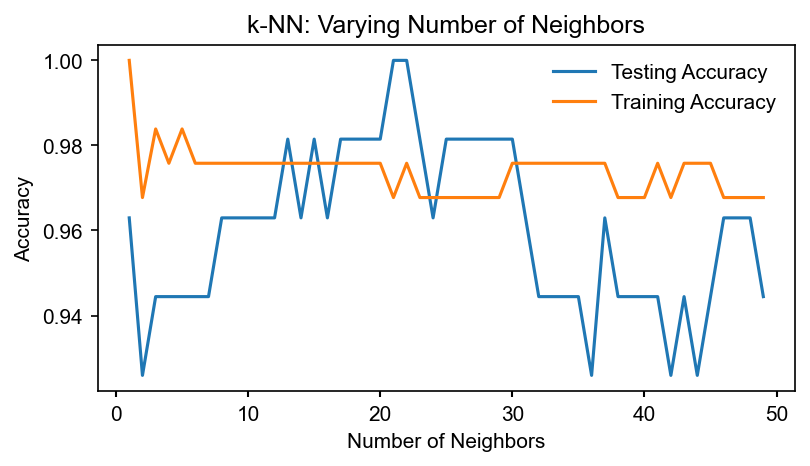

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Setup arrays to store train and test accuracies
neighbors = np.arange(1 , 50)  #<------ choose any range you like (within reason)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k and calculate accuracy
for i, k in enumerate(neighbors):

    model = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the  scaled training data
    model.fit(scaled_X_train , y_train)

    # Compute the accuracy on the scaled training set
    y_train_pred = model.predict(scaled_X_train)
    train_accuracy[i] = accuracy_score(y_train_pred , y_train)

    # Compute the accuracy on the scaled test set
    y_test_pred = model.predict(scaled_X_test)
    test_accuracy[i] = accuracy_score(y_test_pred , y_test)


# Plot the model performance curve
plt.figure(figsize=(6,3))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

What do you observe about model accuracy scores comparing between scaling vs not scaling the features before modeling?